In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import json
import os
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

In [2]:
directory = "covariance_results//"
names = ["beadpack", "ketton", "estaillades"]

In [3]:
class Porestats(object):
    def __init__(self, data):
        self.name = data["name"]
        
        self.porosity = data["porosity"]
        self.porosity_sq = self.porosity*self.porosity
        
        #Covariance: C(x) = cov(x)+Vv^2
        self.covariance_x = np.array(data["x"])
        self.covariance_y =  np.array(data["y"])
        self.covariance_z =  np.array(data["z"])
        
        self.covariance_averaged = np.array(data["averaged"])
        
        #Covariance Function: cov(x) = C(x)-Vv^2
        self.covariance_function_x = self.covariance_x-self.porosity_sq
        self.covariance_function_y = self.covariance_y-self.porosity_sq
        self.covariance_function_z = self.covariance_z-self.porosity_sq
        
        self.covariance_function_averaged = self.covariance_averaged-self.porosity_sq
        
        #Normalized Covariance Function: cov(x)/(Vv-Vv^2)
        self.normalized_covariance_x = np.divide(self.covariance_function_x, self.porosity-self.porosity_sq)
        self.normalized_covariance_y = np.divide(self.covariance_function_y, self.porosity-self.porosity_sq)
        self.normalized_covariance_z = np.divide(self.covariance_function_z, self.porosity-self.porosity_sq)
        
        self.normalized_covariance_averaged = np.divide(self.covariance_function_averaged, self.porosity-self.porosity_sq)
        
        self.fit_x = None
        self.fit_y = None
        self.fit_z = None
        
        self.fit_averaged = None
        
        self.poly_x = None
        self.poly_y = None
        self.poly_z = None
        
        self.poly_averaged = None
        
        self.fit_poly()
        
    def fit_poly(self, N=5):
        self.fit_x = np.polyfit(range(len(self.covariance_x[0:N])), self.covariance_x[0:N], 1)
        self.poly_x = np.poly1d(self.fit_x)
        
        self.fit_y = np.polyfit(range(len(self.covariance_y[0:N])), self.covariance_y[0:N], 1)
        self.poly_y = np.poly1d(self.fit_y)
        
        self.fit_z = np.polyfit(range(len(self.covariance_z[0:N])), self.covariance_z[0:N], 1)
        self.poly_z = np.poly1d(self.fit_z)
        
        self.fit_averaged = np.polyfit(range(len(self.covariance_averaged[0:N])), self.covariance_averaged[0:N], 1)
        self.poly_averaged = np.poly1d(self.fit_averaged)
        
        self.rc_x = (self.porosity_sq-self.porosity)/self.poly_x[1]
        self.rc_y = (self.porosity_sq-self.porosity)/self.poly_y[1]
        self.rc_z = (self.porosity_sq-self.porosity)/self.poly_z[1]
        
        self.rc_averaged = (self.porosity_sq-self.porosity)/self.poly_averaged[1]

In [47]:
covariance_results = {}

for file in os.listdir(directory):
        if file.endswith(".json"):
            with open(directory+file) as data_file:
                data = json.load(data_file)
                covariance_results[data["name"]] = Porestats(data)
                
resolution_file = "image_data/resolutions.json"
with open(resolution_file) as data_file:
    resolutions = json.load(data_file)

[47, 94, 118, 173]
[48, 88, 119, 173]
[48, 85, 126, 167]
[48, 88, 121, 172]
lel [33]
rm ave 98.0
35070.6613717 38246.796 109.056386461
[]
[86]
[81, 156]
[86, 162]
lel [59]
rm ave 522.01044
5291.06661008 52221.3153646 986.971422079
7158.68353876 52695.2175376 736.102067542


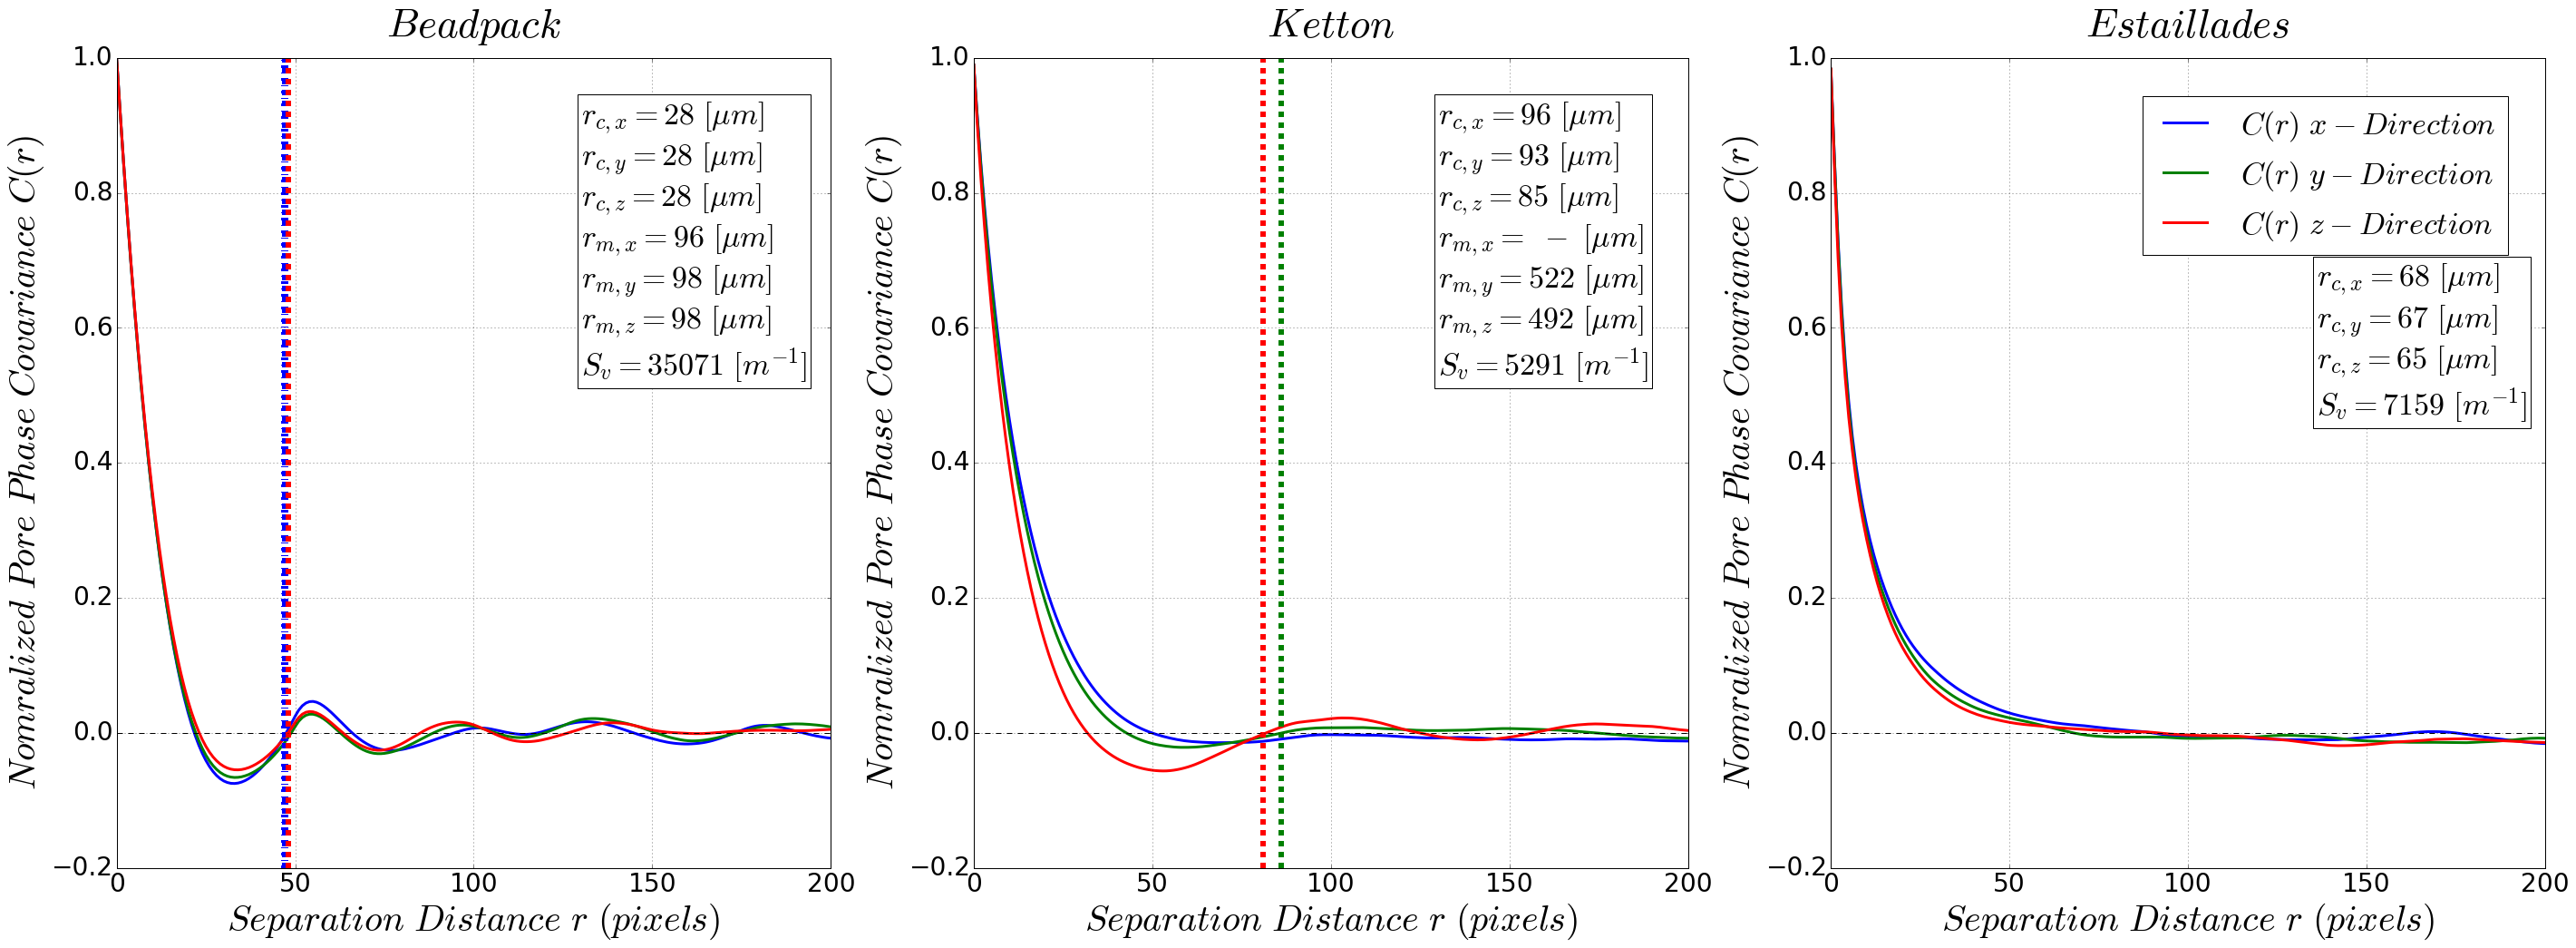

In [118]:
fig, axarr = plt.subplots(1, 3, figsize=(48,16), sharey=False)
ax1 = axarr[0]
ax2 = axarr[1]
ax3 = axarr[2]

#N = 200
for ax, name, pst in zip(axarr, ["beadpack", "ketton", "estaillades"],[covariance_results["beadpack"], covariance_results["ketton"], covariance_results["estaillades"]]):

    ax.set_title(r"$"+name.title()+"$", size=45, y=1.02)
    if name == "beadpack":
        N = 200
        ax.set_ylim(min(pst.covariance_x)*0.9, max(pst.covariance_x[50:200])*1.1)


    elif name == "ketton":
        ax.set_ylim(min(pst.covariance_z)*0.9, max(pst.covariance_z[50:200])*1.1)
    elif name == "estaillades":
        ax.set_ylim(min(pst.covariance_z)*0.9, max(pst.covariance_z[50:200])*1.1)
    else:
        pass
        
    ax.set_ylabel(r'$Nomralized \ Pore \ Phase \ Covariance \ C(r)$', fontsize=40)


    ax.grid()
    ax.set_xlim(0, N)
    ax.set_ylim(-0.2, 1.0)

    #ax.set_title(r'$Pore \ Phase \ Directional \ Covariance \ C(r)$', fontsize=22, y=1.02)

    ax.set_xlabel(r'$Separation \ Distance \ r \ (pixels)$', fontsize=40)


    ax.plot(range(len(pst.normalized_covariance_x)), pst.normalized_covariance_x, label=r'$C(r) \ x-Direction$', color="blue", alpha=1.0, linestyle="-", linewidth=3)
    ax.plot(range(len(pst.normalized_covariance_y)), pst.normalized_covariance_y, label=r'$C(r)\ y-Direction$', color="green", alpha=1.0, linestyle="-", linewidth=3)
    ax.plot(range(len(pst.normalized_covariance_z)), pst.normalized_covariance_z, label=r'$C(r) \ z-Direction$', color="red", alpha=1.0, linestyle="-", linewidth=3)
    ax.plot(range(len(pst.normalized_covariance_x)), [0.0]*len(pst.normalized_covariance_x), color="black", linestyle="--")
    
    if name == "beadpack" or name == "ketton":
        N = 200
        zeros_x = []
        zeros_y = []
        zeros_z = []
        zeros_average = []
        for i in range(len(pst.normalized_covariance_x[0:N])):
            try:
                if (pst.normalized_covariance_x[0:N][i] < 0. and  pst.normalized_covariance_x[0:N][i+1] > 0.):
                    zeros_x.append(i)
                    
                if (pst.normalized_covariance_y[0:N][i] < 0. and  pst.normalized_covariance_y[0:N][i+1] > 0.):
                    zeros_y.append(i)
                if (pst.normalized_covariance_z[0:N][i] < 0. and  pst.normalized_covariance_z[0:N][i+1] > 0.):
                    zeros_z.append(i)
                if (pst.normalized_covariance_averaged[0:N][i] < 0. and  pst.normalized_covariance_averaged[0:N][i+1] > 0.):
                    zeros_average.append(i)
            except IndexError:
                pass
        print zeros_x
        print zeros_y
        print zeros_z
        print zeros_average
        
        rm_x = "undef"
        if len(zeros_x) != 0:
            rm_x = zeros_x[0]#np.where(pst.normalized_covariance_x[0:200] == min(pst.normalized_covariance_x[0:200]))[0]
            rm_x_res = (rm_x+1)*resolutions[name]*1e6
            ax.axvline(rm_x, color="blue", alpha=1.0, linestyle="-.", linewidth=8)
        
        rm_y = zeros_y[0]#np.where(pst.normalized_covariance_y[0:200] == min(pst.normalized_covariance_y[0:200]))[0]
        print "lel", np.where(pst.normalized_covariance_y[0:200] == min(pst.normalized_covariance_y[0:200]))[0]
        rm_z = zeros_z[0]#np.where(pst.normalized_covariance_z[0:200] == min(pst.normalized_covariance_z[0:200]))[0]
        rm_average = zeros_average[0]
        
        rm_y_res = (rm_y+1)*resolutions[name]*1e6
        rm_z_res = (rm_z+1)*resolutions[name]*1e6
        rm_average = (rm_average+1)*resolutions[name]*1e6
        print "rm ave", rm_average
        
        if name == "beadpack":
            ax.axvline(rm_x, color="blue", alpha=1.0, linestyle="--", linewidth=6)
            ax.axvline(rm_y, color="green", alpha=1.0, linestyle="--", linewidth=6)
            ax.axvline(rm_z, color="red", alpha=1.0, linestyle="--", linewidth=6)
        else:            
            ax.axvline(rm_y, color="green", alpha=1.0, linestyle="--", linewidth=6)
            ax.axvline(rm_z, color="red", alpha=1.0, linestyle="--", linewidth=6)
    
        
    Sv_cov = -4*pst.poly_averaged[1]*1./resolutions[name]
    Sv_theo = 6./100e-6*(1.-pst.porosity)
    dp_cov = 6./Sv_cov*(1-pst.porosity)*1e6
    print Sv_cov, Sv_theo, dp_cov

    rc_x_res = (pst.rc_x+1)*resolutions[name]*1e6
    rc_y_res = (pst.rc_y+1)*resolutions[name]*1e6
    rc_z_res = (pst.rc_z+1)*resolutions[name]*1e6
        

    if name == "ketton":
        textstr = '$r_{c,x}=%.0f \ [\mu m] \ \ \ \ $\n$r_{c, y}=%.0f \ [\mu m]$\n$r_{c, z}=%.0f \ [\mu m]$\n$r_{m,x}= \ - \ [\mu m]$\n$r_{m, y}=%.0f \ [\mu m]$\n$r_{m, z}=%.0f \ [\mu m]$\n$S_{v}=%.0f \ [m^{-1}]\ \ $'%(rc_x_res,rc_y_res, rc_z_res, rm_y_res, rm_z_res, Sv_cov)
    elif name == "estaillades":
        textstr = '$r_{c,x}=%.0f \ [\mu m] \ \ \ \ $\n$r_{c, y}=%.0f \ [\mu m]$\n$r_{c, z}=%.0f \ [\mu m]$\n$S_{v}=%.0f \ [m^{-1}]\ \ $'%(rc_x_res,rc_y_res, rc_z_res,Sv_cov)
    else:
        textstr = '$r_{c,x}=%.0f \ [\mu m] \ \ \ \ $\n$r_{c, y}=%.0f \ [\mu m]$\n$r_{c, z}=%.0f \ [\mu m]$\n$r_{m,x}=%.0f \ [\mu m]$\n$r_{m, y}=%.0f \ [\mu m]$\n$r_{m, z}=%.0f \ [\mu m]$\n$S_{v}=%.0f \ [m^{-1}]\ \ $'%(rc_x_res,rc_y_res, rc_z_res, rm_x_res, rm_y_res, rm_z_res, Sv_cov)

    props = dict(facecolor='white', alpha=1.0) #boxstyle='round', 

    # place a text box in upper left in axes coords
    if name == "estaillades":
        text = ax.text(0.68, 0.75, textstr, transform=ax.transAxes, fontsize=34, verticalalignment='top', bbox=props)
    else:
        text = ax.text(0.65, 0.95, textstr, transform=ax.transAxes, fontsize=34, verticalalignment='top', bbox=props)

        
    if name == "estaillades":
        handles, labels = ax.get_legend_handles_labels()
        lgd = ax.legend(handles, labels,  bbox_to_anchor=(0.65, 0.87, 0.32, .102), fontsize=34)
        frame = lgd.get_frame()
        frame.set_facecolor('white')
        frame.set_edgecolor('black')    

    for item in ax.get_xticklabels():
        item.set_fontsize(28)
    for item in ax.get_yticklabels():
        item.set_fontsize(28)

    #ax.set_xlabel(x_label, size=40)
    #ax.set_ylabel(y_label, size=40)
    #ax.set_xlim(0, im.shape[0]+1)
    #ax.set_ylim(0, im.shape[1]+1)
    
fig.canvas.draw()

plt.show()
fig.savefig("covariance_results/covariance_figures/covariance_tryptichon.png", bbox_extra_artists=None, bbox_inches='tight', dpi=300)
plt.close()

NameError: name 'json' is not defined